***New York Yellow Taxi***

The dataset used in this project contains detailed records of Yellow Taxi trips in New York City. It  includes information about trip distances, pickup and dropoff locations, times, fare amounts, tips, and additional charges, among other variables. This dataset is valuable for understanding urban mobility patterns, taxi service demand, and fare structures.

The dataset includes variables such as:
1. VendorID: A code indicating the provider associated with the trip record.
2. tpep_pickup_datetime, tpep_dropoff_datetime: The start and end times of the trip.
3. passenger_count: The number of passengers in the vehicle.
4. trip_distance: The distance of the trip in miles.
5. PULocationID, DOLocationID: The pickup and dropoff location ID as designated by a taxi zone code.
6. fare_amount: The cost of the taxi trip before extras.
7. tip_amount: The tip amount provided by the passangers.
8. total_amount: The total cost of the trip, including all extras.
9. congestion_surcharge: Additional charges applied during peak traffic times.
10. Airport_fee: Fees associated with trips to or from the airport.
11. tolls_amount: Amount paid at tolls.
12. And other variables.

The objectives of this project are -
1. Uncover patterns, trends and anamolies in the taxi trip behavior by performing exploratory data analysis. 
2. Leverage Principal Component Analysis (PCA) for dimensionality reduction to identify and extract the most significant features from our dataset, thereby unveiling the underlying structure and patterns in the data.
3. Use these principal components as predictors in a linear regression model to predict the total_amount variable effectively.

Ultimately, the goal is to develop a streamlined, efficient predictive model that provides insights into the factors influencing total_amount and to assess the feasibility of using reduced-dimension data for accurate predictions in real-world applications.

Data Sources:

1. https://learn.microsoft.com/en-us/azure/open-datasets/dataset-taxi-yellow?tabs=azureml-opendatasets
2. https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

<br>

Loading in all the libraries required.

In [1]:
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(tidyverse)
library(corrplot)
library(caTools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

corrplot 0.84 loaded



<br>

Reading in the CSV file into a dataframe "df" and displaying the first five rows of the dataset.

In [2]:
df <- read_csv("yellow_taxi_dataset.csv")
head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  tpep_pickup_datetime = col_datetime(format = ""),
  tpep_dropoff_datetime = col_datetime(format = ""),
  store_and_fwd_flag = col_character()
)
ℹ Use `spec()` for the full column specifications.




Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
<dbl>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2,0.30,1,N,142,163,2,4.4,3.50,0.5,0.00,0,1,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1,0.00,1,N,71,71,4,-3.0,-1.00,-0.5,0.00,0,-1,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1,0.00,1,N,71,71,4,3.0,1.00,0.5,0.00,0,1,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0,18.80,1,N,132,26,1,70.9,2.25,0.5,0.00,0,1,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1,3.22,1,N,161,145,1,17.0,1.00,0.5,3.30,0,1,25.30,2.5,0.00
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1,5.10,1,N,148,236,1,21.9,3.50,0.5,5.35,0,1,32.25,2.5,0.00


<br>

Removing unnecessary columns from the dataset that are not required for the analysis.

In [3]:
df <- select(df, -`Unnamed: 0`)
print(colnames(df))

 [1] "VendorID"              "tpep_pickup_datetime"  "tpep_dropoff_datetime"
 [4] "passenger_count"       "trip_distance"         "RatecodeID"           
 [7] "store_and_fwd_flag"    "PULocationID"          "DOLocationID"         
[10] "payment_type"          "fare_amount"           "extra"                
[13] "mta_tax"               "tip_amount"            "tolls_amount"         
[16] "improvement_surcharge" "total_amount"          "congestion_surcharge" 
[19] "Airport_fee"          


<br>

Converting the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns from strings to datetime objects for easier manipulation.

In [4]:
df$tpep_pickup_datetime <- as.POSIXct(df$tpep_pickup_datetime)
df$tpep_dropoff_datetime <- as.POSIXct(df$tpep_dropoff_datetime)

<br>

Checking for missing values and removing rows with any missing data.

In [5]:
summary(df)
df <- na.omit(df)

    VendorID     tpep_pickup_datetime          tpep_dropoff_datetime        
 Min.   :1.000   Min.   :2023-01-31 23:49:00   Min.   :2023-01-31 23:54:32  
 1st Qu.:1.000   1st Qu.:2023-02-01 02:58:46   1st Qu.:2023-02-01 03:12:14  
 Median :2.000   Median :2023-02-01 06:54:00   Median :2023-02-01 07:06:49  
 Mean   :1.698   Mean   :2023-02-01 05:33:55   Mean   :2023-02-01 05:49:22  
 3rd Qu.:2.000   3rd Qu.:2023-02-01 07:39:20   3rd Qu.:2023-02-01 07:53:25  
 Max.   :2.000   Max.   :2023-02-01 19:28:53   Max.   :2023-02-02 08:16:48  
 passenger_count trip_distance      RatecodeID     store_and_fwd_flag
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Length:10000      
 1st Qu.:1.000   1st Qu.: 1.100   1st Qu.: 1.000   Class :character  
 Median :1.000   Median : 1.900   Median : 1.000   Mode  :character  
 Mean   :1.248   Mean   : 3.662   Mean   : 2.392                     
 3rd Qu.:1.000   3rd Qu.: 3.700   3rd Qu.: 1.000                     
 Max.   :6.000   Max.   :50.520   Max.   

<br>

Filtering out rows with unrealistic trip distances and total amounts, assuming these are outliers.

The values of trip distances being less than 0 or greater than 100 miles and total amounts being less than 0 or greater than $500.

In [6]:
df <- df %>%
  filter(trip_distance > 0 & trip_distance < 100,
         total_amount > 0 & total_amount < 500)

<br>

Adding new columns - 'trip_duration', 'day_of_the_week' and 'pickup_hour' for analysis.

1.'trip_duration' is the duration of the trip in minutes.

2.'day_of_the_week' is the day of the week when the trip started.

3.'pickup_hour' is the hour of the day when the trip started.

In [7]:
df <- df %>%
  mutate(trip_duration = as.numeric(difftime(tpep_dropoff_datetime, tpep_pickup_datetime, units = "mins")),
         day_of_week = wday(tpep_pickup_datetime, label = TRUE),
         pickup_hour = hour(tpep_pickup_datetime))

<br>

Checking for number of unique values for each feature of the datset.

In [8]:
num_unique_values <- sapply(df, function(x) length(unique(x)))
print(num_unique_values)

             VendorID  tpep_pickup_datetime tpep_dropoff_datetime 
                    2                  7516                  7644 
      passenger_count         trip_distance            RatecodeID 
                    7                  1444                     6 
   store_and_fwd_flag          PULocationID          DOLocationID 
                    2                   149                   218 
         payment_type           fare_amount                 extra 
                    4                   240                    17 
              mta_tax            tip_amount          tolls_amount 
                    2                   768                    29 
improvement_surcharge          total_amount  congestion_surcharge 
                    2                  1594                     2 
          Airport_fee         trip_duration           day_of_week 
                    2                  2303                     2 
          pickup_hour 
                   15 


<br>

Removing unwanted/unnecessary columns from the dataset.

In [9]:
df = select(df, -VendorID, -RatecodeID, -PULocationID, -DOLocationID, -store_and_fwd_flag)

<br>

Performing a final inspection on the cleaned and improved dataset.

In [10]:
summary(df)
str(df)

 tpep_pickup_datetime          tpep_dropoff_datetime         passenger_count
 Min.   :2023-01-31 23:49:00   Min.   :2023-01-31 23:54:32   Min.   :0.000  
 1st Qu.:2023-02-01 03:02:35   1st Qu.:2023-02-01 03:16:50   1st Qu.:1.000  
 Median :2023-02-01 06:54:56   Median :2023-02-01 07:07:41   Median :1.000  
 Mean   :2023-02-01 05:34:52   Mean   :2023-02-01 05:50:30   Mean   :1.249  
 3rd Qu.:2023-02-01 07:39:28   3rd Qu.:2023-02-01 07:53:35   3rd Qu.:1.000  
 Max.   :2023-02-01 19:28:53   Max.   :2023-02-02 08:16:48   Max.   :6.000  
                                                                            
 trip_distance    payment_type    fare_amount         extra      
 Min.   : 0.01   Min.   :1.000   Min.   :  0.00   Min.   :0.000  
 1st Qu.: 1.11   1st Qu.:1.000   1st Qu.:  8.60   1st Qu.:0.000  
 Median : 1.90   Median :1.000   Median : 12.10   Median :1.000  
 Mean   : 3.73   Mean   :1.202   Mean   : 18.78   Mean   :1.187  
 3rd Qu.: 3.78   3rd Qu.:1.000   3rd Qu.: 19.80   3rd 

tibble[,17] [9,754 × 17] (S3: tbl_df/tbl/data.frame)
 $ tpep_pickup_datetime : POSIXct[1:9754], format: "2023-02-01 00:32:53" "2023-02-01 00:29:33" ...
 $ tpep_dropoff_datetime: POSIXct[1:9754], format: "2023-02-01 00:34:34" "2023-02-01 01:01:38" ...
 $ passenger_count      : num [1:9754] 2 0 1 1 1 1 1 1 1 1 ...
 $ trip_distance        : num [1:9754] 0.3 18.8 3.22 5.1 8.9 1.2 7.49 0.51 0.78 1.57 ...
 $ payment_type         : num [1:9754] 2 1 1 1 1 1 1 1 1 1 ...
 $ fare_amount          : num [1:9754] 4.4 70.9 17 21.9 41.5 7.2 30.3 5.8 7.2 10 ...
 $ extra                : num [1:9754] 3.5 2.25 1 3.5 3.5 3.5 1 1 1 1 ...
 $ mta_tax              : num [1:9754] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ tip_amount           : num [1:9754] 0 0 3.3 5.35 3.5 2.44 8.82 1.62 2.44 1 ...
 $ tolls_amount         : num [1:9754] 0 0 0 0 0 0 0 0 0 0 ...
 $ improvement_surcharge: num [1:9754] 1 1 1 1 1 1 1 1 1 1 ...
 $ total_amount         : num [1:9754] 9.4 74.7 25.3 32.2 50 ...
 $ congestion_surch

<br>

<br>

Plotting a histogram for trip_distance to understand the distribution of trip lengths. Also, I limit the x-axis to the 95th percentile to focus on common trip lengths and exclude extreme values.

Warning message:
“Removed 484 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


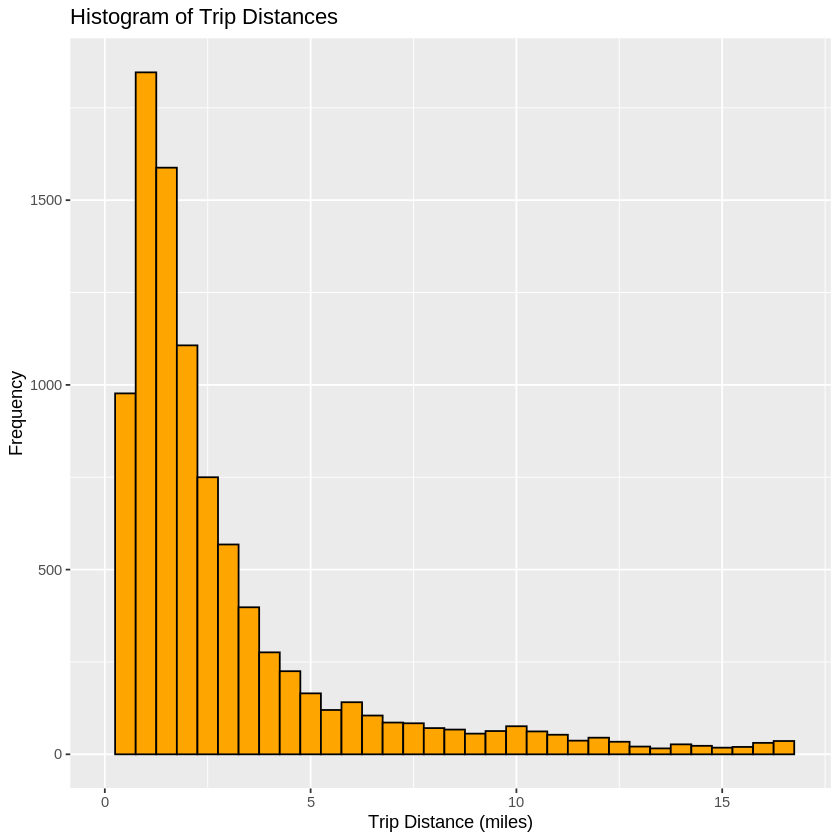

In [11]:
ggplot(df, aes(x=trip_distance)) +
  geom_histogram(binwidth = 0.5, fill="orange", color="black") +
  xlim(0, quantile(df$trip_distance, 0.95)) +
  ggtitle("Histogram of Trip Distances") +
  xlab("Trip Distance (miles)") +
  ylab("Frequency")

The histogram above for trip_distance shows a right-skewed distribution implying that most of the yellow taxi trips are short distances with a significant concentration of trips under 5 miles. Although the high number of short distance trips, there are also a considerable amount of trips that are more than 5 miles long.

<br>

Plotting a histogram for total_amount to show the distribution of the amount charged for rides.

Warning message:
“Removed 488 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


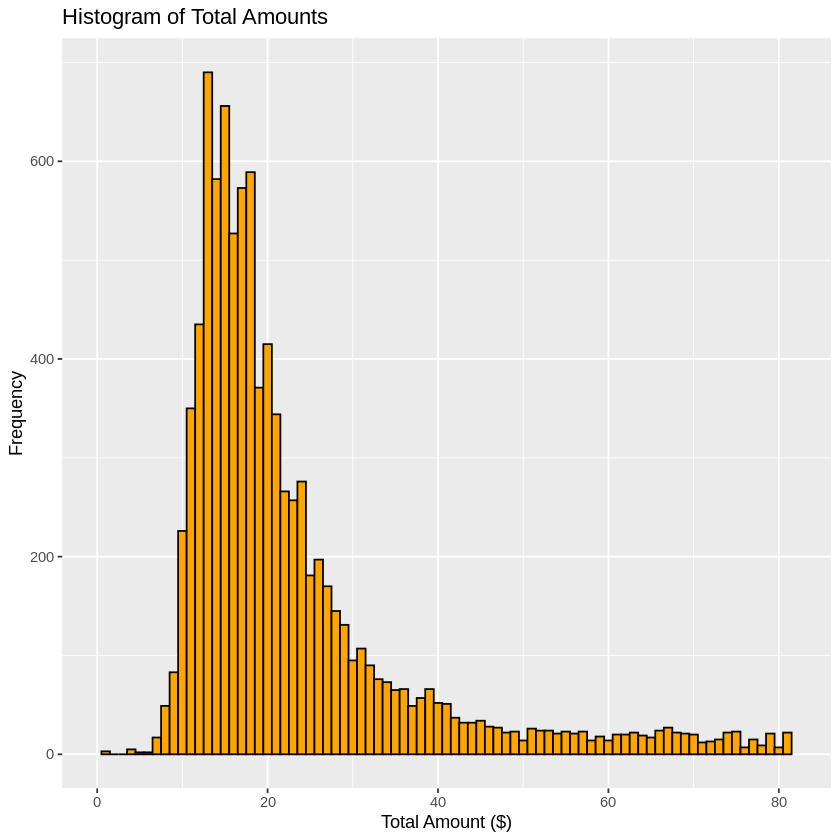

In [12]:
ggplot(df, aes(x=total_amount)) +
  geom_histogram(binwidth = 1, fill="orange", color="black") +
  xlim(0, quantile(df$total_amount, 0.95)) +
  ggtitle("Histogram of Total Amounts") +
  xlab("Total Amount ($)") +
  ylab("Frequency")

The histogram above for total_amount shows a right-skewed distribution similar to the trip_distance. This is very common in service based industries. Most of the taxi fares are clustered around the lower end of the scale with a peak frequency for the total_amount less than 50$. This distribution suggests that taxi rides are relatively cheap and affordable with few rides which are costing significantly more, possibly due to longer distance trips, bad weather, higher traffic times, or additional surcharges.

<br>

Plotting a scatter plot to examine the relationship between the distance of trips (trip_distance) and fare charges (total_amount), highlighting how these variables are related.

Warning message:
“Removed 591 rows containing missing values (geom_point).”


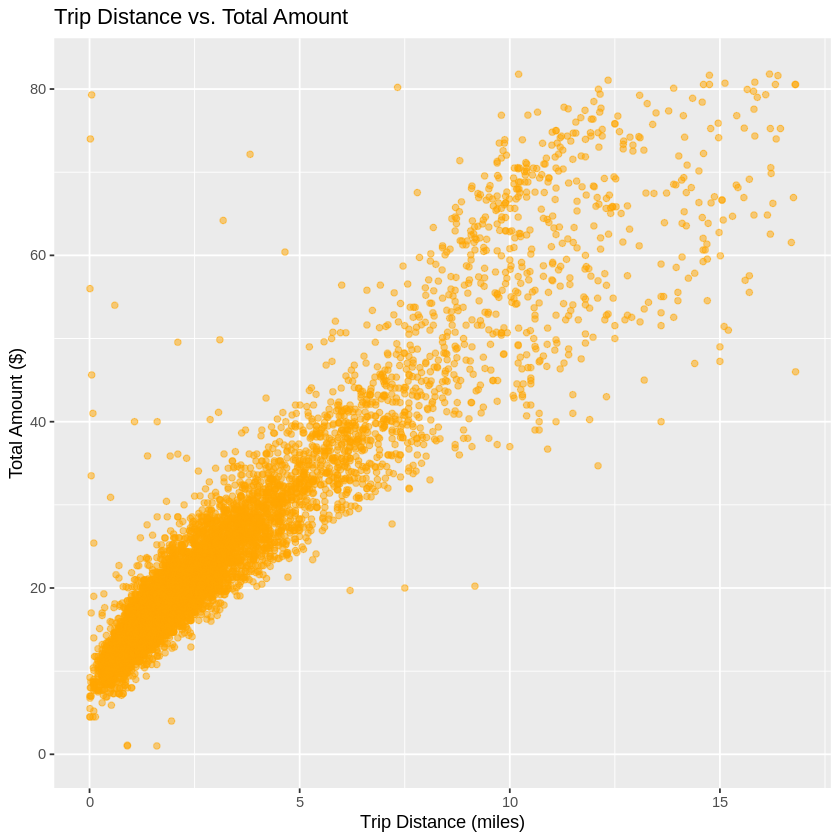

In [13]:
ggplot(df, aes(x=trip_distance, y=total_amount)) +
  geom_point(alpha=0.5, color="orange") +
  xlim(0, quantile(df$trip_distance, 0.95)) +
  ylim(0, quantile(df$total_amount, 0.95)) +
  ggtitle("Trip Distance vs. Total Amount") +
  xlab("Trip Distance (miles)") +
  ylab("Total Amount ($)")

The scatterplot above illustrates the relationship between trip_distance and total_amount shows a positive correlation. As trip distances increase, there's a general trend towards higher fare charges. This correlation aligns with the understanding that longer trips should cost more due to the greater distance covered. However, the plot also shows variability in total_amount  for trips of similar distances, suggesting that other factors like traffic conditions, time of day, route taken, weather conditions or surcharges also influence the total amount charged.

<br>

Calculating the correlation matrix for selected numerical variables - (trip_distance, total_amount, fare_amount, tip_amount) and visualizing it using a heatmap, to help identify how these variables are related.

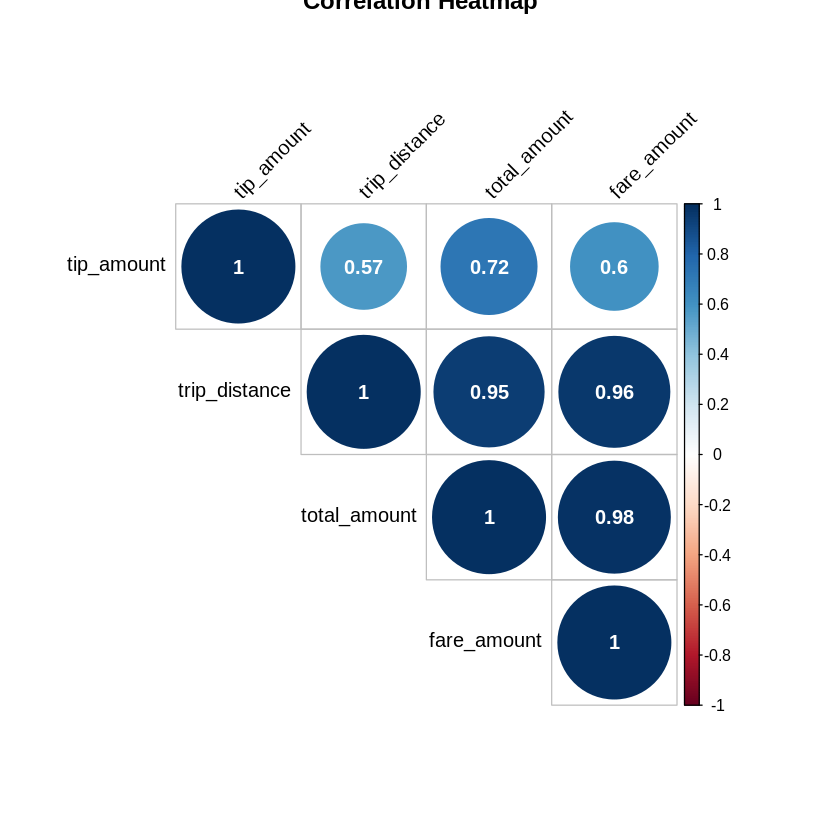

In [14]:
num_vars <- df %>% select(trip_distance, total_amount, fare_amount, tip_amount)
cor_matrix <- cor(num_vars, use="complete.obs")

corrplot(cor_matrix, method="circle", type="upper", order="hclust",
         tl.col="black", tl.srt=45,
         title="Correlation Heatmap",
         addCoef.col = "white")

The correlation heatmap above provides a visualization of the relationships between several key numerical variables in the dataset: trip distance, total amount, fare amount, and tip amount. The heatmap annotations displays the correlation coefficients, ranging from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate a lack of linear correlation.

Some of the key insights from the heatmap are :
1. trip_distance and total_amount: There's a strong positive correlation (0.95), implying the observation from the scatter plot that longer trips tend to have higher total charges is true.
2. fare_amount and total_amount: There's a strong positive correlation (0.98), indicating that the fare amount is a significant component of the total amount charged.
3. tip_amount and total_amount: There's a strong positive correlation (0.72), suggesting that as the total amount charged increases, tip amounts also tend to increase, although this relationship is not as strong as that between fare_amount and total_amount.
4. trip_distance and tip_amount: There's a weaker relationship (0.57) suggesting that trip distance is not highly correlated with the tip amount.

<br>

Printing out the structure of the dataset.

In [15]:
str(df)

tibble[,17] [9,754 × 17] (S3: tbl_df/tbl/data.frame)
 $ tpep_pickup_datetime : POSIXct[1:9754], format: "2023-02-01 00:32:53" "2023-02-01 00:29:33" ...
 $ tpep_dropoff_datetime: POSIXct[1:9754], format: "2023-02-01 00:34:34" "2023-02-01 01:01:38" ...
 $ passenger_count      : num [1:9754] 2 0 1 1 1 1 1 1 1 1 ...
 $ trip_distance        : num [1:9754] 0.3 18.8 3.22 5.1 8.9 1.2 7.49 0.51 0.78 1.57 ...
 $ payment_type         : num [1:9754] 2 1 1 1 1 1 1 1 1 1 ...
 $ fare_amount          : num [1:9754] 4.4 70.9 17 21.9 41.5 7.2 30.3 5.8 7.2 10 ...
 $ extra                : num [1:9754] 3.5 2.25 1 3.5 3.5 3.5 1 1 1 1 ...
 $ mta_tax              : num [1:9754] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ tip_amount           : num [1:9754] 0 0 3.3 5.35 3.5 2.44 8.82 1.62 2.44 1 ...
 $ tolls_amount         : num [1:9754] 0 0 0 0 0 0 0 0 0 0 ...
 $ improvement_surcharge: num [1:9754] 1 1 1 1 1 1 1 1 1 1 ...
 $ total_amount         : num [1:9754] 9.4 74.7 25.3 32.2 50 ...
 $ congestion_surch

The above structure shows that the dataset includes a few features which are not of type 'num'.

<br>

Excluding the features which are not of type 'num' and normalizing the dataset. This is to prepare the dataset for the principle component analysis (PCA) and regression analysis.

In [16]:
features <- select(df, -day_of_week, -pickup_hour, -tpep_pickup_datetime, -tpep_dropoff_datetime)
features_scaled <- scale(features)
features_scaled_df <- as.data.frame(features_scaled)
head(features_scaled_df)

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9398185,-0.7275801,1.7246907,-0.80210676,1.5614914,0.08623061,-0.83276228,-0.2589604,0.02264554,-0.78977708,0.3255921,-0.2921245,-0.27566721
2,-1.5617478,3.1961309,-0.4364903,2.90691667,0.7175065,0.08623061,-0.83276228,-0.2589604,0.02264554,2.15585535,-3.0710126,3.4228465,0.32543476
3,-0.3109646,-0.1082700,-0.4364903,-0.09934442,-0.1264783,0.08623061,0.02009697,-0.2589604,0.02264554,-0.07199079,0.3255921,-0.2921245,-0.04596980
4,-0.3109646,0.2904639,-0.4364903,0.17395204,1.5614914,0.08623061,0.54990347,-0.2589604,0.02264554,0.24175857,0.3255921,-0.2921245,-0.01960568
5,-0.3109646,1.0964153,-0.4364903,1.26713789,1.5614914,0.08623061,0.07178541,-0.2589604,0.02264554,1.04306088,0.3255921,-0.2921245,0.24370598
6,-0.3109646,-0.5366968,-0.4364903,-0.64593735,1.5614914,0.08623061,-0.20216332,-0.2589604,0.02264554,-0.55322361,0.3255921,-0.2921245,-0.23513237


<br>

Subsetting the data set into training and testing data to perform pca and linear regression. Also, displaying number of rows in the two datasets.

In [17]:
set.seed(1000)
sample <- sample.split(features_scaled_df, SplitRatio = 0.7)
train_data  = subset(features_scaled_df, sample == TRUE)
test_data  = subset(features_scaled_df, sample == FALSE)
nrow(train_data)
nrow(test_data)
head(train_data)

[1] 6752

[1] 3002

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9398185,-0.7275801,1.7246907,-0.80210676,1.5614914,0.08623061,-0.83276228,-0.2589604,0.02264554,-0.78977708,0.3255921,-0.2921245,-0.2756672
3,-0.3109646,-0.1082700,-0.4364903,-0.09934442,-0.1264783,0.08623061,0.02009697,-0.2589604,0.02264554,-0.07199079,0.3255921,-0.2921245,-0.0459698
5,-0.3109646,1.0964153,-0.4364903,1.26713789,1.5614914,0.08623061,0.07178541,-0.2589604,0.02264554,1.04306088,0.3255921,-0.2921245,0.2437060
6,-0.3109646,-0.5366968,-0.4364903,-0.64593735,1.5614914,0.08623061,-0.20216332,-0.2589604,0.02264554,-0.55322361,0.3255921,-0.2921245,-0.2351324
8,-0.3109646,-0.6830406,-0.4364903,-0.72402206,-0.1264783,0.08623061,-0.41408592,-0.2589604,0.02264554,-0.65344283,0.3255921,-0.2921245,-0.2354619
9,-0.3109646,-0.6257757,-0.4364903,-0.64593735,-0.1264783,0.08623061,-0.20216332,-0.2589604,0.02264554,-0.55322361,0.3255921,-0.2921245,-0.2051432


The train data and test data have 6752 and 3002 rows respectively.

<br>

Forming a new dataset 'train_features' with the train data excluding 'total_amount'.

In [18]:
train_features <- select(train_data,-total_amount)
head(train_features)

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_duration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9398185,-0.7275801,1.7246907,-0.80210676,1.5614914,0.08623061,-0.83276228,-0.2589604,0.02264554,0.3255921,-0.2921245,-0.2756672
3,-0.3109646,-0.1082700,-0.4364903,-0.09934442,-0.1264783,0.08623061,0.02009697,-0.2589604,0.02264554,0.3255921,-0.2921245,-0.0459698
5,-0.3109646,1.0964153,-0.4364903,1.26713789,1.5614914,0.08623061,0.07178541,-0.2589604,0.02264554,0.3255921,-0.2921245,0.2437060
6,-0.3109646,-0.5366968,-0.4364903,-0.64593735,1.5614914,0.08623061,-0.20216332,-0.2589604,0.02264554,0.3255921,-0.2921245,-0.2351324
8,-0.3109646,-0.6830406,-0.4364903,-0.72402206,-0.1264783,0.08623061,-0.41408592,-0.2589604,0.02264554,0.3255921,-0.2921245,-0.2354619
9,-0.3109646,-0.6257757,-0.4364903,-0.64593735,-0.1264783,0.08623061,-0.20216332,-0.2589604,0.02264554,0.3255921,-0.2921245,-0.2051432


<br>

Performing principle component analysis (PCA) for dimensionality reduction to identify and extract the most significant features from our dataset

Importance of components:
                         Comp.1   Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.937752 1.190114 1.07429179 1.02620662 1.00160281
Proportion of Variance 0.312907 0.118031 0.09617524 0.08775834 0.08360068
Cumulative Proportion  0.312907 0.430938 0.52711321 0.61487155 0.69847223
                           Comp.6    Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.97819538 0.9534439 0.84587633 0.61790686 0.58320732
Proportion of Variance 0.07973885 0.0757546 0.05962556 0.03181741 0.02834423
Cumulative Proportion  0.77821108 0.8539657 0.91359125 0.94540865 0.97375288
                          Comp.11     Comp.12
Standard deviation     0.53845158 0.158225413
Proportion of Variance 0.02416084 0.002086273
Cumulative Proportion  0.99791373 1.000000000

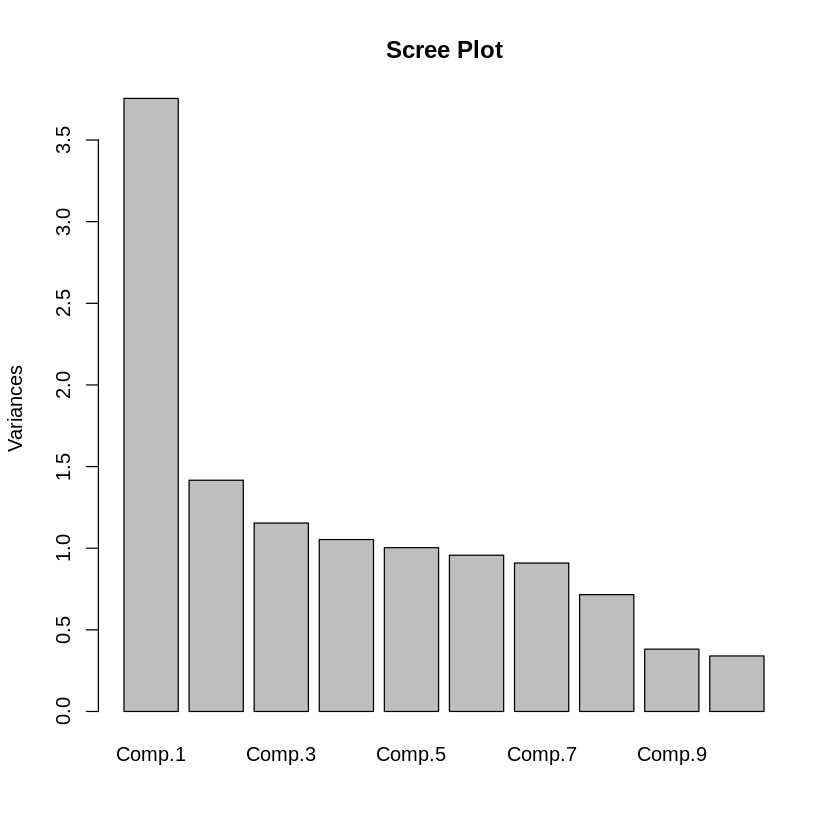

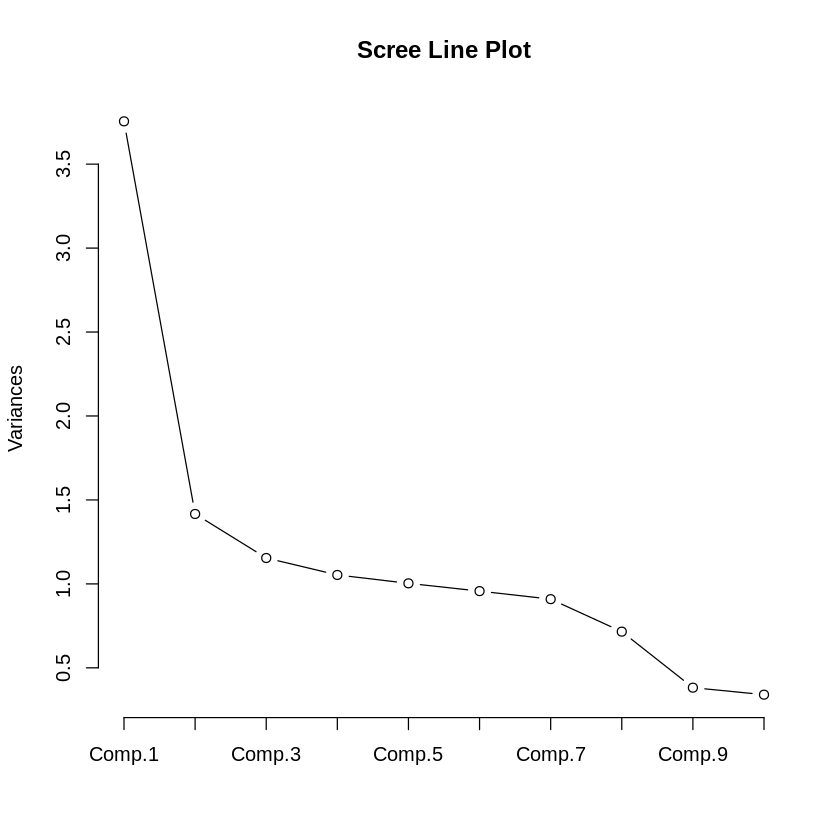

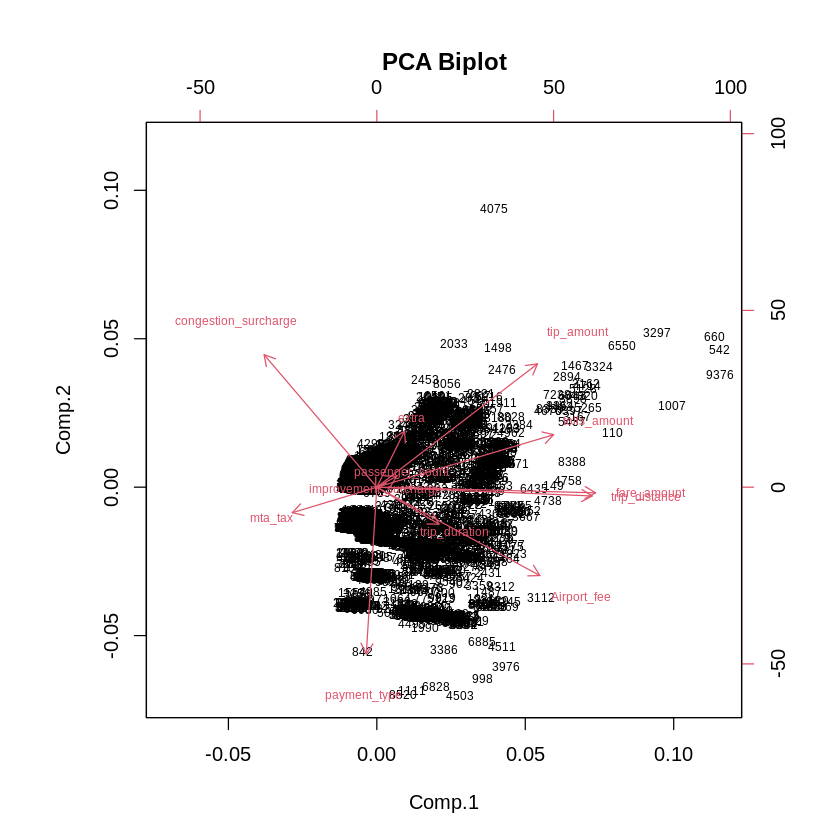

In [19]:
pca_res <- princomp(train_features, cor = TRUE)

summary(pca_res)
plot(pca_res, main = "Scree Plot")
plot(pca_res,type="lines", main ="Scree Line Plot")
biplot(pca_res, cex = 0.6, main = "PCA Biplot")

Based on the PCA scree plot, we observed that the cumulative variance significantly plateaus after the first five components. This suggests that we can effectively reduce the dimensionality of our dataset to these principal components to capture the most substantial variance within our data.

Additionally, examining the biplot reveals that certain original variables, specifically mta_tax, fare_amount, tip_amount, congestion_surcharge, and Airport_fee, exhibit high variance and are thus likely to contribute significantly to these principal components.

<br>

With the insights derived from PCA, we proceed to build our linear regression model by focusing on the above variables, excluding other less impactful ones, to predict 'total_amount'.

<u> Linear Regression Model No 1 

In [20]:
train_data <- na.omit(train_data)
model_1 <- lm(total_amount ~ mta_tax + tip_amount+ fare_amount + tolls_amount + trip_distance + congestion_surcharge + Airport_fee, data = train_data)
summary(model_1)


Call:
lm(formula = total_amount ~ mta_tax + tip_amount + fare_amount + 
    tolls_amount + trip_distance + congestion_surcharge + Airport_fee, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17095 -0.01899 -0.01700  0.02584  0.26299 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004903  0.0005169  -0.949    0.343    
mta_tax               0.0081930  0.0006860  11.943   <2e-16 ***
tip_amount            0.1791649  0.0006679 268.250   <2e-16 ***
fare_amount           0.8056534  0.0023170 347.713   <2e-16 ***
tolls_amount          0.1082760  0.0007618 142.138   <2e-16 ***
trip_distance         0.0000305  0.0023264   0.013    0.990    
congestion_surcharge  0.0321350  0.0006338  50.703   <2e-16 ***
Airport_fee           0.0180231  0.0007441  24.220   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04247 on 6744 degrees of freedom
Multiple 

In [21]:
residuals_1 <- resid(model_1)
SSE_1 <- sum(residuals_1^2)
SSE_1

[1] 12.16289

In [22]:
prediction_plot_1 <- data.frame(actual = train_data$total_amount, predicted=(predict(model_1)))
head(prediction_plot_1)

,actual,predicted
,<dbl>,<dbl>
1,-0.78977708,-0.81806908
3,-0.07199079,-0.09906492
5,1.04306088,1.01114367
6,-0.55322361,-0.57926366
8,-0.65344283,-0.68014642
9,-0.55322361,-0.57926638


`geom_smooth()` using formula 'y ~ x'



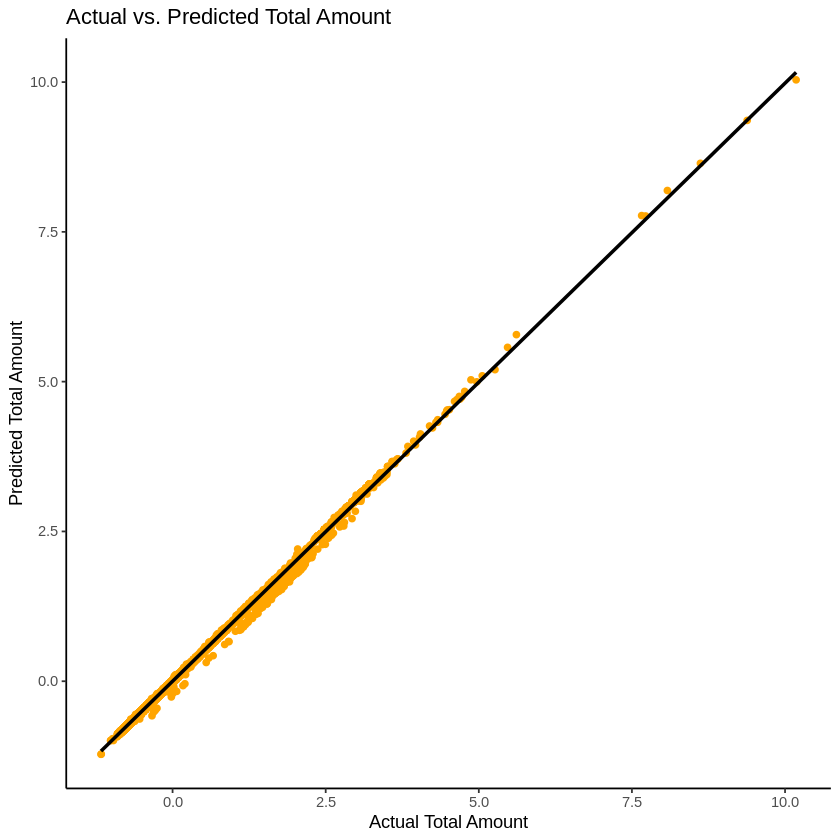

In [23]:
ggplot(prediction_plot_1, aes(x = actual, y = predicted)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  xlab("Actual Total Amount") +
  ylab("Predicted Total Amount") +
  theme_classic() +
  ggtitle("Actual vs. Predicted Total Amount")

Looking at the regression model's summary, it is evident that trip_distance exhibits a notably high p-value, significantly exceeding the common threshold for statistical significance (typically p < 0.05). This high p-value indicates that trip_distance, within the context of this model and alongside the other predictors, does not significantly contribute to the variance in 'total_amount'.

<br>

<u> Linear Regression Model No 2

We will refine our regression model by removing 'trip_distance' and focus solely on variables that have demonstrated statistically significant relationships with the target variable.

In [24]:
model_2 <- lm(total_amount ~ mta_tax + tip_amount+ fare_amount + tolls_amount + congestion_surcharge + Airport_fee, data = train_data)
summary(model_2)


Call:
lm(formula = total_amount ~ mta_tax + tip_amount + fare_amount + 
    tolls_amount + congestion_surcharge + Airport_fee, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17095 -0.01899 -0.01700  0.02584  0.26300 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.0004903  0.0005169  -0.949    0.343    
mta_tax               0.0081975  0.0005942  13.796   <2e-16 ***
tip_amount            0.1791646  0.0006674 268.459   <2e-16 ***
fare_amount           0.8056814  0.0009009 894.334   <2e-16 ***
tolls_amount          0.1082794  0.0007163 151.162   <2e-16 ***
congestion_surcharge  0.0321346  0.0006330  50.766   <2e-16 ***
Airport_fee           0.0180240  0.0007406  24.336   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04246 on 6745 degrees of freedom
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9982 
F-statistic: 6.298e+05 on 6 and 6745

In [25]:
residuals_2 <- resid(model_2)
SSE_2 <- sum(residuals_2^2)
SSE_2

[1] 12.16289

In [26]:
prediction_plot_2 <- data.frame(actual = train_data$total_amount, predicted=(predict(model_2)))
head(prediction_plot_2)

,actual,predicted
,<dbl>,<dbl>
1,-0.78977708,-0.8180700
3,-0.07199079,-0.0990653
5,1.04306088,1.0111448
6,-0.55322361,-0.5792662
8,-0.65344283,-0.6801466
9,-0.55322361,-0.5792662


`geom_smooth()` using formula 'y ~ x'



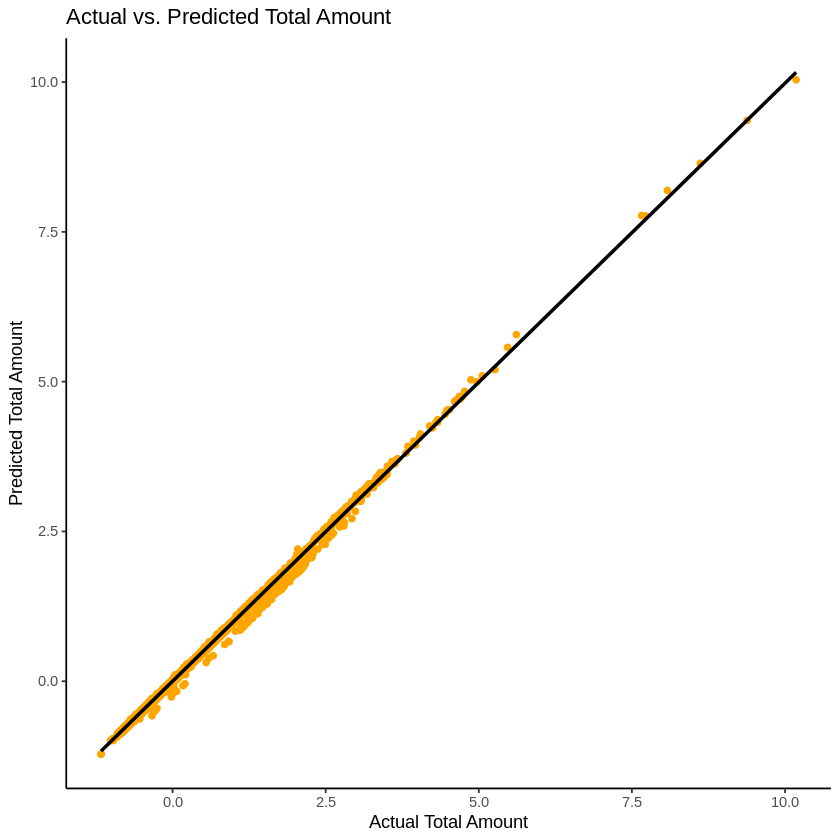

In [27]:
ggplot(prediction_plot_2, aes(x = actual, y = predicted)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  xlab("Actual Total Amount") +
  ylab("Predicted Total Amount") +
  theme_classic() +
  ggtitle("Actual vs. Predicted Total Amount")

Comparing the first two regression models reveals a consistent narrative in predicting 'total_amount' with a minor adjustment in the predictor variables. In the updated model, the removal of 'trip_distance' does not diminish the model's predictive capability. Coefficients for variables remain significantly impactful, with similar estimates and standard errors, reinforcing their strong influence on the 'total amount'. The maintained high R-squared value of 0.9982 across both models underscores the robustness of this relationship, indicating that even without 'trip_distance', the model exceptionally explains the variance in 'total_amount'.

<br>

<u> Linear Regression Model No 3

Adding all the variables of significance to this model to observe how the model performs.

In [28]:
model_3 <- lm(total_amount ~ ., data = train_data)
summary(model_3)


Call:
lm(formula = total_amount ~ ., data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139796 -0.017731  0.003888  0.016786  0.168300 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.0003695  0.0004016  -0.920   0.3576    
passenger_count        0.0026712  0.0003980   6.711 2.09e-11 ***
trip_distance         -0.0013418  0.0018099  -0.741   0.4585    
payment_type           0.0022133  0.0004583   4.830 1.40e-06 ***
fare_amount            0.8084847  0.0018099 446.691  < 2e-16 ***
extra                  0.0276070  0.0004195  65.807  < 2e-16 ***
mta_tax                0.0061567  0.0005350  11.509  < 2e-16 ***
tip_amount             0.1788700  0.0005837 306.463  < 2e-16 ***
tolls_amount           0.1028244  0.0005976 172.071  < 2e-16 ***
improvement_surcharge  0.0007365  0.0003740   1.969   0.0490 *  
congestion_surcharge   0.0282717  0.0004962  56.975  < 2e-16 ***
Airport_fee            0.0149369  

In [29]:
residuals_3<- resid(model_3)
SSE_3 <- sum(residuals_3^2)
SSE_3

[1] 7.336144

In [30]:
prediction_plot_3 <- data.frame(actual = train_data$total_amount, predicted=(predict(model_3)))
head(prediction_plot_3)

,actual,predicted
,<dbl>,<dbl>
1,-0.78977708,-0.7684581
3,-0.07199079,-0.1034438
5,1.04306088,1.0553711
6,-0.55322361,-0.5378101
8,-0.65344283,-0.6852502
9,-0.55322361,-0.5843105


`geom_smooth()` using formula 'y ~ x'



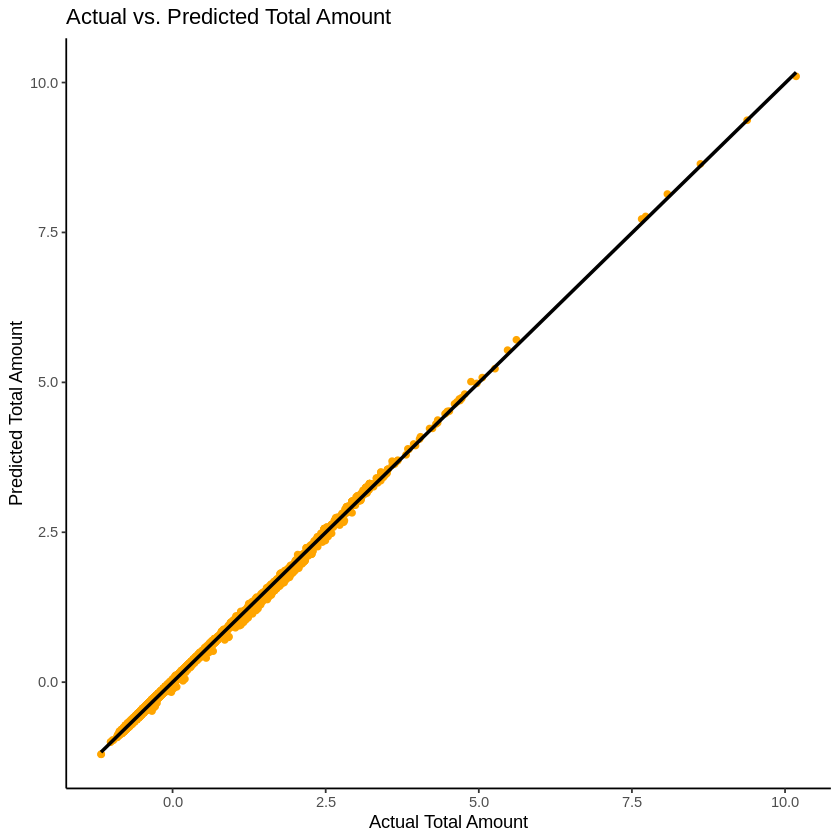

In [31]:
ggplot(prediction_plot_3, aes(x = actual, y = predicted)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  xlab("Actual Total Amount") +
  ylab("Predicted Total Amount") +
  theme_classic() +
  ggtitle("Actual vs. Predicted Total Amount")

Incorporating all of the significant variables into the regression model yields an almost perfect predictive score, signifying the model's exceptional accuracy in forecasting 'total_amount'. However, the primary objective of this analysis is to streamline the dataset by reducing dimensionality while retaining predictive power for test values. This approach emphasizes the importance of balancing model complexity with interpretability and efficiency, underscoring the need for careful selection of predictors that contribute most meaningfully to the prediction.

<br>

<u> Linear Regression Model No 4

After evaluating previous models, I've decided to focus on 'trip_distance', 'fare_amount', 'tip_amount', and 'trip_duration' as key predictors in a streamlined linear regression model to assess their collective performance.

In [32]:
model_4 <- lm(total_amount ~  trip_distance + fare_amount + tip_amount + trip_duration, data = train_data)
summary(model_4)


Call:
lm(formula = total_amount ~ trip_distance + fare_amount + tip_amount + 
    trip_duration, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93549 -0.02494 -0.00397  0.02145  1.25040 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.000783   0.001136  -0.689  0.49082    
trip_distance  0.072852   0.004278  17.029  < 2e-16 ***
fare_amount    0.786105   0.004396 178.834  < 2e-16 ***
tip_amount     0.206541   0.001404 147.132  < 2e-16 ***
trip_duration -0.003315   0.001110  -2.987  0.00283 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09337 on 6747 degrees of freedom
Multiple R-squared:  0.9914,	Adjusted R-squared:  0.9914 
F-statistic: 1.941e+05 on 4 and 6747 DF,  p-value: < 2.2e-16


In [33]:
residuals_4<- resid(model_4)
SSE_4 <- sum(residuals_4^2)
SSE_4

[1] 58.81895

In [34]:
prediction_plot_4 <- data.frame(actual = train_data$total_amount, predicted=(predict(model_4)))
head(prediction_plot_4)

,actual,predicted
,<dbl>,<dbl>
1,-0.78977708,-0.8554146
3,-0.07199079,-0.0824626
5,1.04306088,1.0892153
6,-0.55322361,-0.5886327
8,-0.65344283,-0.7044465
9,-0.55322361,-0.5952216


`geom_smooth()` using formula 'y ~ x'



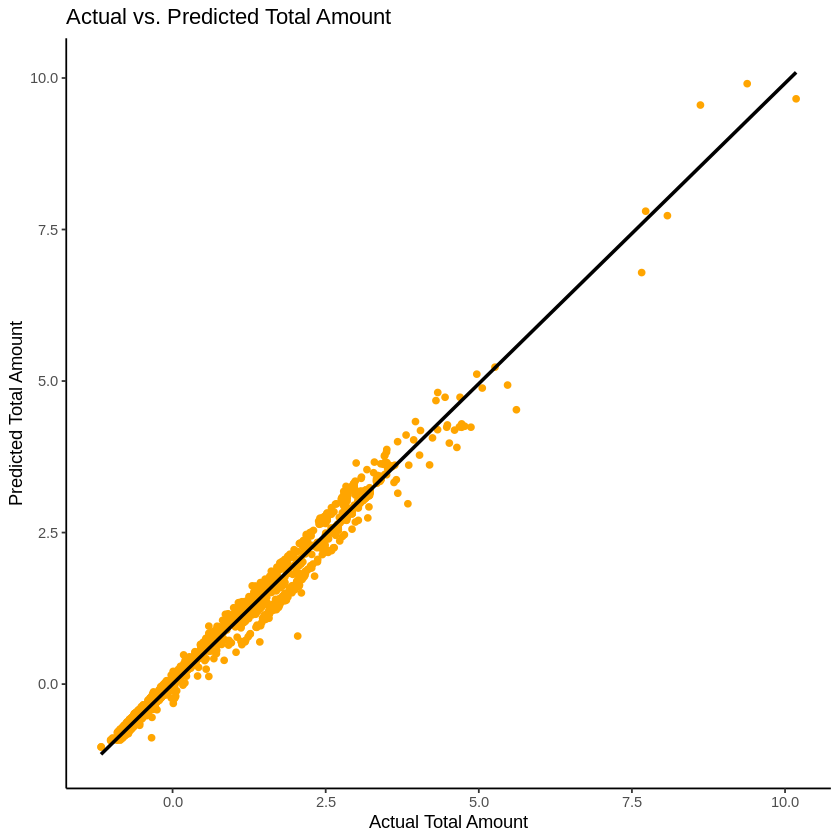

In [35]:
ggplot(prediction_plot_4, aes(x = actual, y = predicted)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  xlab("Actual Total Amount") +
  ylab("Predicted Total Amount") +
  theme_classic() +
  ggtitle("Actual vs. Predicted Total Amount")

This regression model incorporating 'trip_distance', 'fare_amount', 'tip_amount', and 'trip_duration' as predictors for 'total_amount' showcases remarkable predictive strength, evidenced by significant coefficients and a near-perfect Multiple R-squared value of 0.9914, demonstrating that it explains over 99% of the variance in the 'total_amount'.

<br>

<u>Prediction of model 4 on Testing Values

Applying the 'model_4' to the test dataset. This step is crucial for assessing the model's generalizability and accuracy in predicting unseen data, providing insight into its real-world applicability.

In [36]:
prediction <- predict(model_4, test_data)
prediction_plot <- data.frame(Actual= test_data$total_amount, Predicted=prediction)
head(prediction_plot)

,Actual,Predicted
,<dbl>,<dbl>
2,2.1558553,2.34412469
4,0.2417586,0.27076504
7,0.7776154,0.86130486
12,-0.0602534,-0.05833944
15,-0.6633745,-0.72313866
17,2.5689210,2.40521763


In [37]:
MAE <- mean(abs(prediction_plot$Actual - prediction_plot$Predicted))
print(paste("Mean Absolute Error (MAE):", MAE))

RMSE <- sqrt(mean((prediction_plot$Actual - prediction_plot$Predicted)^2))
print(paste("Root Mean Squared Error (RMSE):", RMSE))

SST <- sum((prediction_plot$Actual - mean(prediction_plot$Actual))^2)
SSR <- sum((prediction_plot$Predicted - prediction_plot$Actual)^2)
R_squared <- 1 - (SSR/SST)
print(paste("R-squared:", R_squared))

[1] "Mean Absolute Error (MAE): 0.0477472758961266"
[1] "Root Mean Squared Error (RMSE): 0.0913392977153767"
[1] "R-squared: 0.991441602790606"


`geom_smooth()` using formula 'y ~ x'



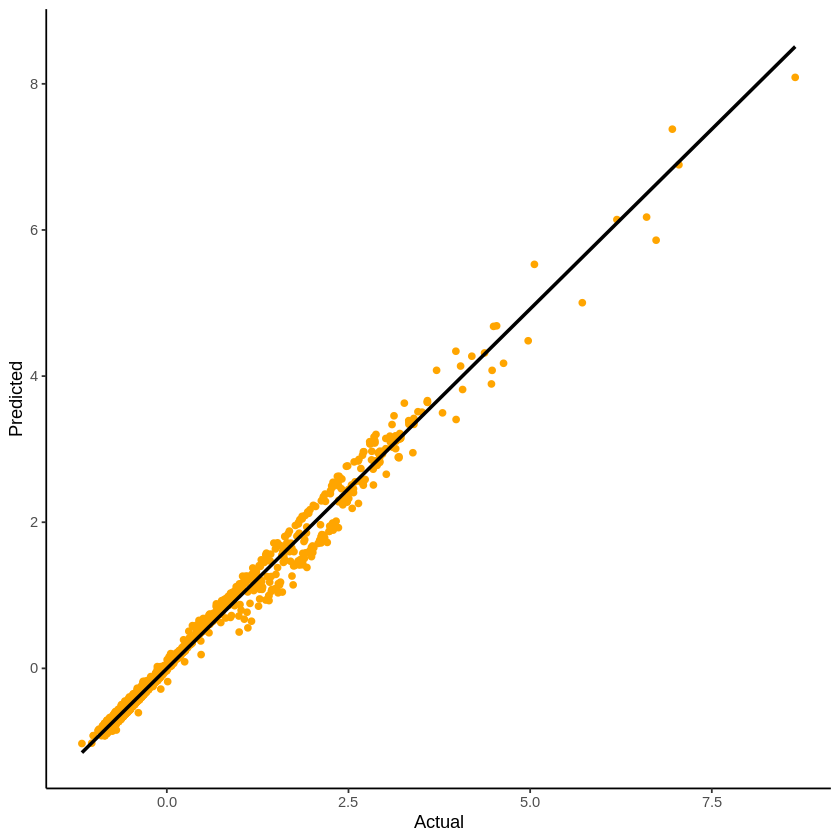

In [38]:
ggplot(prediction_plot, aes(x = Actual, y = Predicted)) +
  geom_point(color = "orange") +
  geom_smooth(method = lm, color = "black") +
  xlab("Actual") + 
  ylab("Predicted") +
  theme_classic()

The calculated Mean Absolute Error (MAE) of 0.0477 and the Root Mean Squared Error (RMSE) of 0.0913 indicate that the model's predictions are quite close to the actual total_amount values, with relatively small average errors. The R-squared value of 0.9914 suggests that the model explains approximately 99.14% of the variance in the dependent variable, highlighting its excellent fit to the data. Overall, these metrics demonstrate the model's high predictive accuracy and effectiveness in capturing the key factors that influence taxi fare amounts.

<br>